### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 13th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.

<font color='lime'> y = w_1 * x_1 + w_2 * x_2 where w the weight and x_1 and x_2 are input features. I am guessing that because the equation is linear, the model will not learn any non-linearities. After running the network my guess is confirmed. This model can only learn linear boundaries. For data that is not linearly separable like XOR, the model doesnt perform well because it cant capture the nonlinear decision boundary we would need. </font>

SRT: Mostly. Remember that the synapse to the output will also have a weight, and the output neuron may have an activation (which is linear in this case). -2 points.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*

<font color='lime'> By adding another neuron and changing to ReLu activation the network appears to be able to correctly classify the XOR data in most runs now that we can have non-linear decision boundaries, but its clear it would do a better job if there were at least one more neuron.</font>


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?
<font color='lime'> When we increase the number of neurons it appears to model the date much more effectively. The model classification is more stable/consistent when compared to only using 2 neurons which changed drastically. However there is still variablity from run to run because the path to convergence varies.</font>


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?
<font color='lime'> After experimenting, I found that we must have at least 3 neurons and 1 hidden layer to achieve this test loss. I also decreased the learning rate and increased the regularization rate to acheive this. </font>

5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

<font color='lime'>  It appears that increasing the model size can improve the fit because it allows the network to find patterns more easily which should lead to a better fit, but the convergence speed decreeases because the model takes longer to train. Also after multiple runs it seems that the model doesnt consistently converge.</font>

## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

In [21]:
from astroML.datasets import fetch_sdss_galaxy_colors
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc



In [5]:
data =np.load('/Users/mcgowkb1/ASTR8070/repos/astr_8070_s24/coursework/homeworks/hw_data/hw8_data_1.npy')
print("Column names:", data.dtype.names)

Column names: ('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')


In [ ]:
data =np.load('/Users/mcgowkb1/ASTR8070/repos/astr_8070_s24/coursework/homeworks/hw_data/hw8_data_1.npy')
print("Column names:", data.dtype.names)

Column names: ('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')


In [6]:
# Slice every other 10th row
reduced_data = data[::10]

# Sort colors for reduced data
u_g = reduced_data['u'] - reduced_data['g']
g_r = reduced_data['g'] - reduced_data['r']
r_i  = reduced_data['r'] - reduced_data['i']
i_z  = reduced_data['i'] - reduced_data['z']

# Redshift & spectral class arrays
redshift = reduced_data['redshift']
spectral_class = reduced_data['specClass']

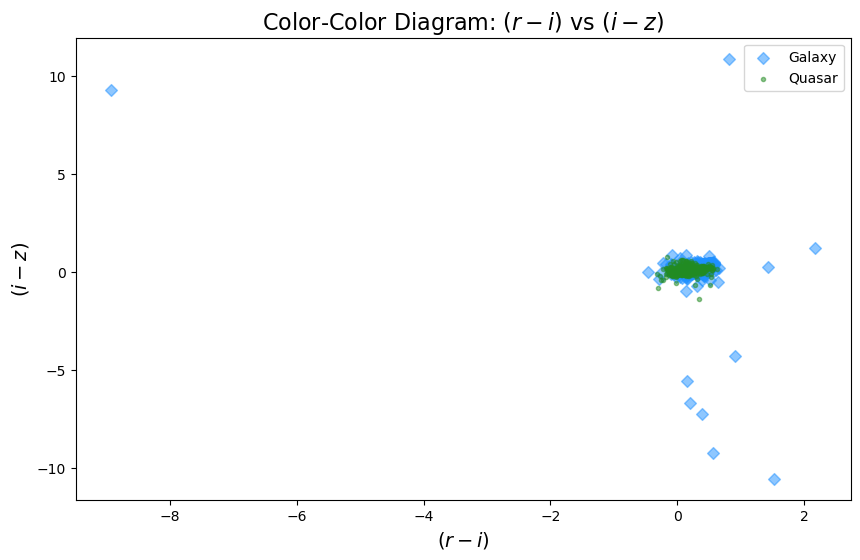

In [10]:
# Scatter plot
plt.figure(figsize=(10, 6))

# Plot galaxies
plt.scatter(r_i[spectral_class == 'GALAXY'], i_z[spectral_class == 'GALAXY'], marker = 'D', color = 'dodgerblue', label='Galaxy', alpha=0.5)
# Plot quasars
plt.scatter(r_i[spectral_class == 'QSO'], i_z[spectral_class == 'QSO'], marker = '.', color = 'forestgreen', label='Quasar', alpha=0.5)
plt.xlabel(r'$(r-i)$', fontsize=14)
plt.ylabel(r'$(i-z)$', fontsize=14)
plt.title('Color-Color Diagram: $(r-i)$ vs $(i-z)$', fontsize=16)
plt.legend()
plt.show()


SRT: I would have clipped the outliers here.

In [17]:
# Data matrix X stacks r_i and i_z
X = np.column_stack((r_i, i_z))

# Create target label array where 0 is for galaxy and 1 is for quasar
#y = np.where(reduced_data['specClass'] == 'GALAXY', 0, 1)
y = np.array([0 if s_class == 'GALAXY' else 1 for s_class in reduced_data['specClass']])

# Train-test split with 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#print("X_train shape:", X_train.shape)
#print("X_test shape:", X_test.shape)


In [18]:
# Scale training & testing data for DNN 
scaler = StandardScaler()

# Fit the scaler to training data & transform
X_train_scaled = scaler.fit_transform(X_train)

# Repeat for test data
X_test_scaled = scaler.transform(X_test)

print("Training data shape:", X_train_scaled.shape)
print("Testing data shape:", X_test_scaled.shape)

Training data shape: (4000, 2)
Testing data shape: (1000, 2)


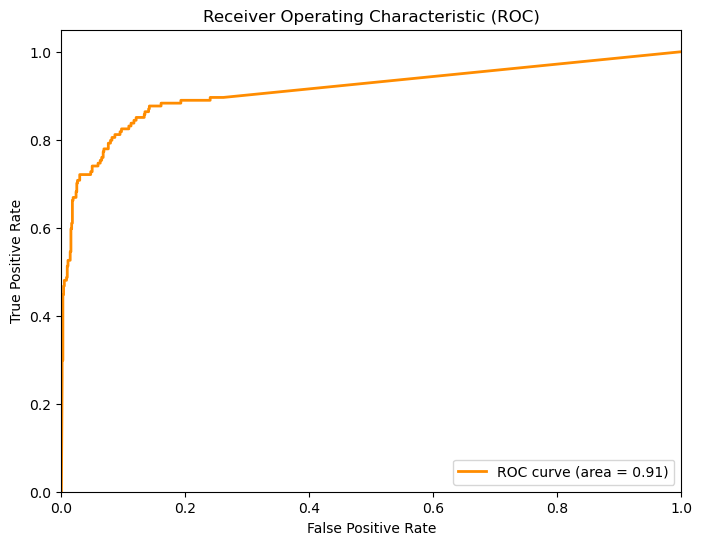

In [20]:
# MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5, 2), activation='relu', solver='sgd', 
                    random_state=42, max_iter=1000)

# Fit model
mlp.fit(X_train_scaled, y_train)

# Predict probabilities for test set
y_scores = mlp.predict_proba(X_test_scaled)[:, 1] 

# Compute ROC curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [22]:
# Parameter grid
parameters = {
    'solver': ['lbfgs', 'sgd', 'adam'],
    'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)],
    'activation': ['relu', 'tanh'],
    'random_state': [42],
    'max_iter': [1000]
}

# Call MLPClassifier
mlp = MLPClassifier()

# Call GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=parameters, cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get best parameters & the classification score on training data
best_param = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_param)
print("Best cross-validation score (accuracy): {:.2f}".format(best_score))
#not bad 

/Users/mcgowkb1/opt/anaconda3/envs/ASTR8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mcgowkb1/opt/anaconda3/envs/ASTR8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mcgowkb1/opt/anaconda3/envs/ASTR8070/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptr

Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}
Best cross-validation score (accuracy): 0.94


In [23]:
# New optimized MLPClassifier w/ best parameters
new_mlp = MLPClassifier(**grid_search.best_params_)

# Fit optimized model
new_mlp.fit(X_train_scaled, y_train)

# Predict probabilities for test set w/ optimized model
y_scores_opt = new_mlp.predict_proba(X_test_scaled)[:, 1]

# Get ROC curve & AUC for optimized model
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_scores_opt)
roc_auc_opt = auc(fpr_opt, tpr_opt)

In [24]:
# Call og MLPClassifier
og_mlp = MLPClassifier(hidden_layer_sizes=(5, 2), activation='relu', solver='sgd', 
                             random_state=42, max_iter=1000)

# Fit og model
og_mlp.fit(X_train_scaled, y_train)

# Predict probabilities for test set w/ the og model
y_scores_orig = og_mlp.predict_proba(X_test_scaled)[:, 1]

# Get ROC curve and AUC for og model
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_scores_orig)
roc_auc_orig = auc(fpr_orig, tpr_orig)


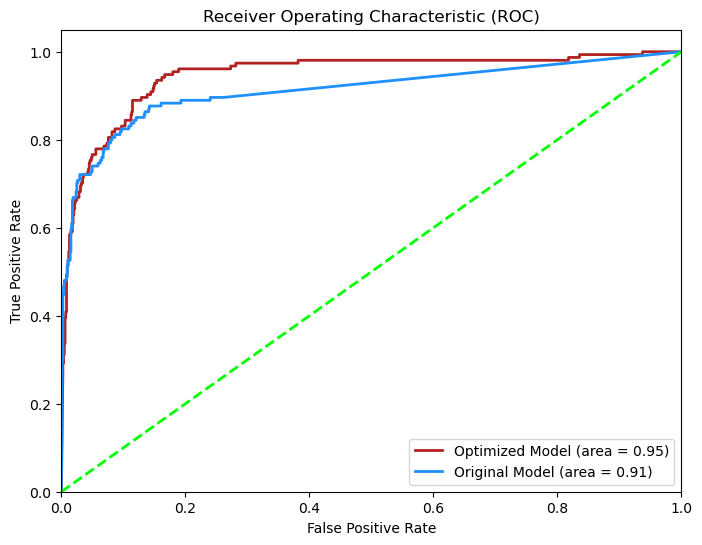

In [25]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_opt, tpr_opt, label='Optimized Model (area = %0.2f)' % roc_auc_opt, color='firebrick', lw=2)
plt.plot(fpr_orig, tpr_orig, label='Original Model (area = %0.2f)' % roc_auc_orig, color='dodgerblue', lw=2)
#plt.plot([0, 1], [0, 1], color='lime', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


SRT: Excellent, Kaylah.